# Intro and Imports
As is common, some basic packages are imported at the beginning of every python dataset. Above, kaggle already imports numpy and pandas, which are the most common tools for any analysis project. For EDA, seaborn and matplotlib are also very valuable to visualize the data. Further, the datasets are read in as pandas dataframes.

The data contained in this task is from two different solar power generation sites located somewhere in India. The data, as we know from the description, spans 34 days and contains information regarding power generation and weather data for each site. The data for each site is broken into two different data sets, which will be merged later in this notebook. 

Briefly, solar power generation works by placing solar panels on the earth, usually in areas that receive as much direct sunlight as possible throughout the day. Photons (or particles of light) knock electrons free of atoms, which generates an electrical flow. This electrical current can be used as DC power or passed through and inverter and converted to AC power. More information is readily available on the internet and it is left to the reader to discover more should they wish to. A thorough understanding of solar power generation is not required for the work below.

In this notebook, the data from the power generation sites will be examined, cleaned, and some predictive modeling will be demonstrated.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme(style='whitegrid')

In [4]:
pg1 = pd.read_csv('dataset/Plant_1_Generation_Data.csv')
pg2 = pd.read_csv('dataset/Plant_2_Generation_Data.csv')
wd1 = pd.read_csv('dataset/Plant_1_Weather_Sensor_Data.csv')
wd2 = pd.read_csv('dataset/Plant_2_Weather_Sensor_Data.csv')

df_list = [pg1,wd1,pg2,wd2]

Here, a quick examination of the power generation data is conducted. Some things to note:

1. The plant ID column and Source Key columns will likely be removed for any predictive analysis.

2. The DC and AC power units are kW, which implies the same for Daily_Yield and TOTAL_YIELD. Likely, those will be reduced to GW, as is more common for production rates of that size.

3. There are about 68,000 rows. Not a massive dataset, but it might be worth parallelizing some functions later.

4. There are no NA's in the first power generation dataframe.

5. The datetime column is listed as an 'object' type and likely needs to be converted to a pandas datetime type

6. Presumably, irradiation is in units of W/m^2 but that may be incorrect. It will be the assumption going forward but it cannot be confirmed without more information.

These examinations of the given data are repeated for each data set to determine their basic parameters. This method could have been accomplished by looping through each dataset with a subsequent print function, but honestly, that seems more complicated than is necessary to just look at the basics. Plus, Jupyter Notebooks make seeing the data seperately quite easy, so this should be an acceptable format for this forum.

In [5]:
print("====================")
print(pg1.describe())
print("====================")
print(pg1.info())
print("====================")
print(pg1.isna().sum())

        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06
<class 'pandas.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  str    
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  str    
 3   DC_POWER     68778 non-null  fl

In [6]:
print("====================")
print(pg2.describe())
print("====================")
print(pg2.info())
print("====================")
print(pg2.isna().sum())

        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09
<class 'pandas.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  str    
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  str    
 3   DC_POWER     67698 non-null  fl

In [7]:
print("====================")
print(wd1.describe())
print("====================")
print(wd1.info())
print("====================")
print(wd1.isna().sum())

        PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652
<class 'pandas.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   str    
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   str    
 3   AMBIENT_TEM

In [8]:
print("====================")
print(wd2.describe())
print("====================")
print(wd2.info())
print("====================")
print(wd2.isna().sum())

        PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766
<class 'pandas.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   str    
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   str    
 3   AMBIENT_TEM

After a quick look at all the other data sets, one thing seems odd at first glance. For the power generation 1 dataframe, the max DC power is over 14,000kW while the max AC power is just over 1410 kW. Similar numbers are being reported at other percentiles in the dataframe. This is odd because there is usually a 90+% conversion efficiency from DC to AC. The second power generation data set seems to more show this sort of conversion efficiency, with DC power outputs being only slightly higher than the AC outputs. That raises the question as to whether or not PG1 is doing something different than the PG2 site. Maybe Site 1 is producing DC power but only converting some of it to AC? Or maybe the DC power data is not in kW as described in the supplied information? Or perhaps there was merely a data logging/entry error on the DC data. It's hard to tell from this data what is happening here.

Next we will turn the datetime data into datetime types in each dataframe. Time series analysis is a complicated type of data analysis but it is critical to have the data in the proper format going forward, so the datetimes should be in datetime format.



In [9]:
for i, j in enumerate(df_list):
    j['DATE_TIME'] = pd.to_datetime(j['DATE_TIME'])

C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\608298744.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  j['DATE_TIME'] = pd.to_datetime(j['DATE_TIME'])


# Inverter Data Analysis
The data on the inverters is an excellent start to understanding this data set. There are 22 inverters in each plant. The inverters convert DC power to AC power, so their performance can be examined by looking at the DC to AC conversions.

Power Generation Site #1 has 22 inverters
Power Generation Site #2 has 22 inverters
Plant 1 Mean AC Output for each inverter


C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\4079498695.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=pg1,x='SOURCE_KEY',y='AC_POWER',color='green',ci=None)


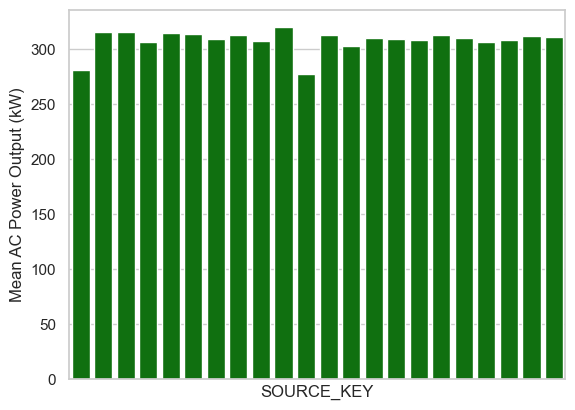

Plant 2 Mean AC Output for each inverter


C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\4079498695.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=pg2,x='SOURCE_KEY',y='AC_POWER',color='green',ci=None)


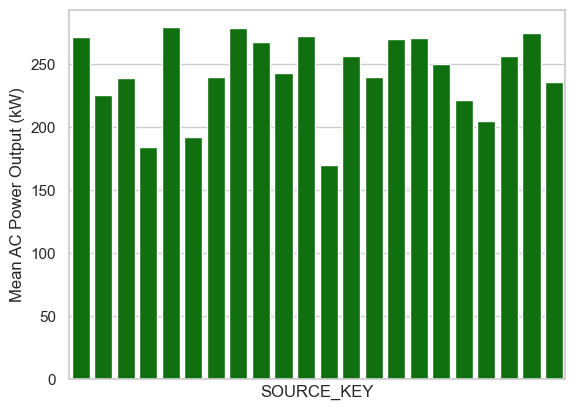

In [10]:
# Prove the inverter quantities
pg1_inverters=pg1['SOURCE_KEY'].nunique()
pg2_inverters=pg2['SOURCE_KEY'].nunique()
print(f'Power Generation Site #1 has {pg1_inverters} inverters')
print(f'Power Generation Site #2 has {pg2_inverters} inverters')

print(f"Plant 1 Mean AC Output for each inverter")
ax=sns.barplot(data=pg1,x='SOURCE_KEY',y='AC_POWER',color='green',ci=None)
# Seaborn automatically takes the average of the AC Power generated by each inverter for the plot
plt.xticks([])
ax.set(ylabel='Mean AC Power Output (kW)')
plt.show()

print(f"Plant 2 Mean AC Output for each inverter")
ax=sns.barplot(data=pg2,x='SOURCE_KEY',y='AC_POWER',color='green',ci=None)
plt.xticks([])
ax.set(ylabel='Mean AC Power Output (kW)')
plt.show()

### Results
Right off, the site 1 inverters appear largely stable in the AC power generated. The site 2 inverters, however, fluctuate wildly. This could be due to several factors, but it is likely that maintenance could be an issue at site 2. A quick look at the standard deviation of the data in these figures will better quantify the extent to which the data flucuates.

In [11]:
s1 = pg1.groupby('SOURCE_KEY').mean()['AC_POWER'].std()
print(f'The plant 1 inverters are relatively '
      f'stable with only a {s1:.2f} kW standard deviation in the mean')

s2 = pg2.groupby('SOURCE_KEY').mean()['AC_POWER'].std()
print(f'The plant 2 inverters are relatively '
      f'unstable with a {s2:.2f} kW standard deviation in the mean')

The plant 1 inverters are relatively stable with only a 10.07 kW standard deviation in the mean
The plant 2 inverters are relatively unstable with a 32.00 kW standard deviation in the mean


# Power Generation Data Analysis
### Merging Data
With the inverter information established, the next step is to explore the relationship between solar irradiation and power generation. Since the data for each site has two datasets (one for power and one for weather), it would be beneficial to combine these datasets into a single dataframe for each site. Along with merging the datasets, time and date columns are created, in case that data is needed going forward.

In [12]:
# Merge the weather and generation data
m1 = pg1.merge(wd1,right_on='DATE_TIME',left_on='DATE_TIME')
m1 = m1.drop(['PLANT_ID_y','SOURCE_KEY_y'],axis=1)
m1['TIME']=m1['DATE_TIME'].dt.time
m1['DATE']=m1['DATE_TIME'].dt.date
m2 = pg2.merge(wd2,right_on='DATE_TIME',left_on='DATE_TIME')
m2 = m2.drop(['PLANT_ID_y','SOURCE_KEY_y'],axis=1)
m2['TIME']=m2['DATE_TIME'].dt.time
m2['DATE']=m2['DATE_TIME'].dt.date

print(m1.info())
print(m2.info())

<class 'pandas.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[us]
 1   PLANT_ID_x           68774 non-null  int64         
 2   SOURCE_KEY_x         68774 non-null  str           
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   AMBIENT_TEMPERATURE  68774 non-null  float64       
 8   MODULE_TEMPERATURE   68774 non-null  float64       
 9   IRRADIATION          68774 non-null  float64       
 10  TIME                 68774 non-null  object        
 11  DATE                 68774 non-null  object        
dtypes: datetime64[us](1), float64(7), int64(1), object(2), str(1)
memory usage: 6.3+ MB
None
<class 'pa

### Data visualization of irradiation at each site

The plots below show the irradiation data available for analysis. Data vizualization can help to determine abnormalities or irregularity in the data. For example, here we can notice that there were several days at site 1 without any irradiation, yet the second site seemed exempt from these gaps in irradiation. These gaps actually seem large enough that there may be a data issue on those specific days.

<Axes: title={'center': 'Site 2 irradiation (kW) by day'}, xlabel='DATE_TIME'>

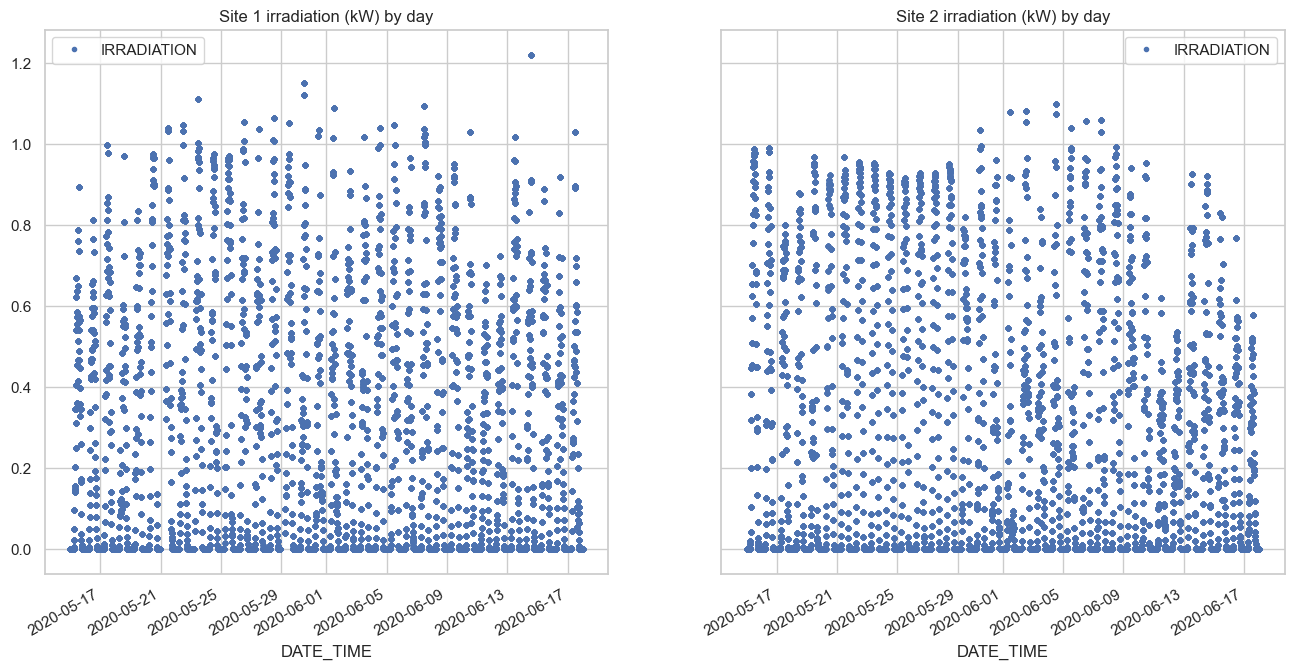

In [13]:
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
m1.plot(x="DATE_TIME",y="IRRADIATION",style='.', title='Site 1 irradiation (kW) by day',ax=ax[0])
m2.plot(x="DATE_TIME",y="IRRADIATION",style='.', title='Site 2 irradiation (kW) by day', ax=ax[1])


In a similar fashion, it is useful to examine the data as a function of time, irregardless of the specific date. These graphs show that solar irradiation starts and ends at roughly the same time for each site, perhaps indicating similar latitudes for each site. It also makes comparison of some data between the two sites more acceptable. For example, if Site 1 has triple the power output of Site 2, but also had triple the "On-Sun" time as Site 2, there would be no need to explore possible other reasons for the difference in power output, such as mechanical issues at Site 2. For this data, the irradiation rates start around 5:30 in the morning and end around 18:00 in the evening. It's worth pointing out that the power generated at the end of the time ranges will be far less than in the middle as the light will be more diffuse, so not only is the length of "On-Sun" time valuable information shown here, but also the amount of time with high-intensity sun exposure is shown by the peak of the data.

<Axes: title={'center': 'Site 2 Irradiation (W/m^2) by time'}, xlabel='TIME'>

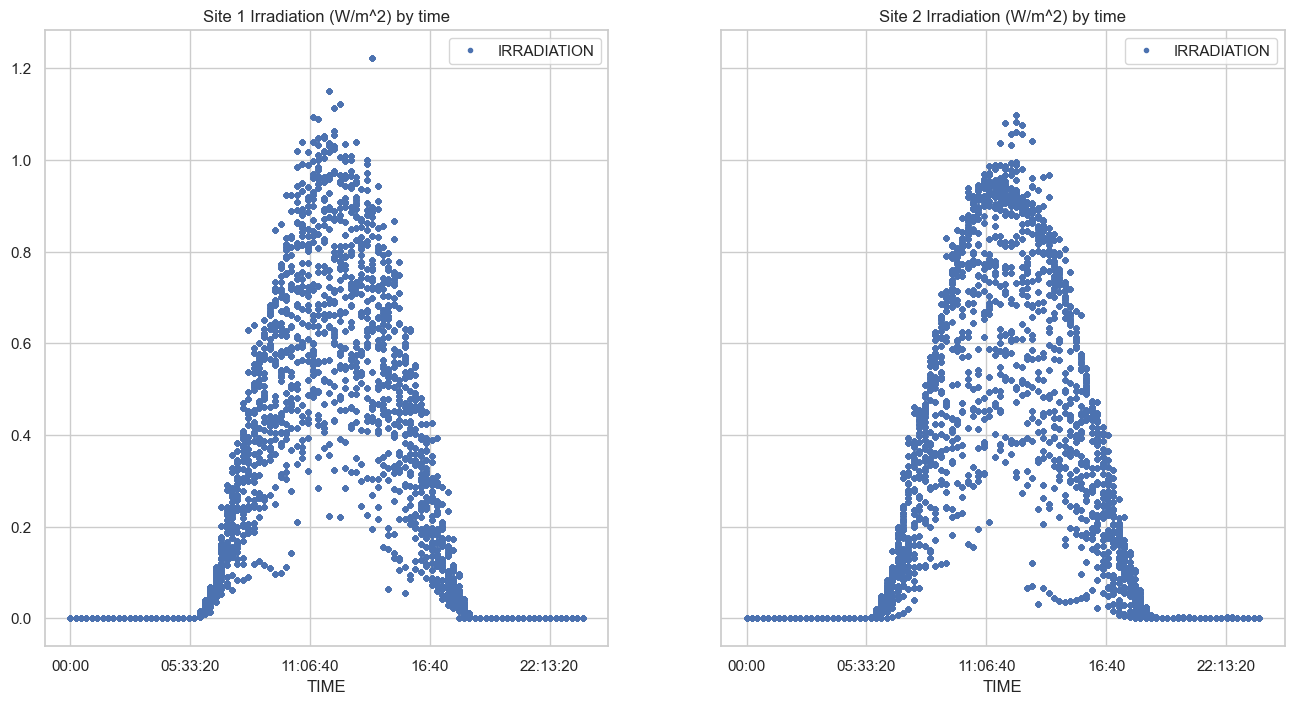

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
m1.plot(x='TIME',y='IRRADIATION',style='.',title='Site 1 Irradiation (W/m^2) by time',ax=ax[0])
m2.plot(x='TIME',y='IRRADIATION',style='.',title='Site 2 Irradiation (W/m^2) by time',ax=ax[1])

### Irradiation vs DC power output
As described above, the amount of power generated by a solar site is related to the "On-Sun" time of the panels and the intesity of solar exposure. As such, irradiation can likely be correlated to the amount of power produced. That is shown here, by comparing the shapes of the irradiation data and the DC power generated when compared to time. Each site will naturally have different data, so the plots maintain fidelity of location and are split by site.

<Axes: title={'center': 'Site 2 DC (kW) by time'}, xlabel='TIME'>

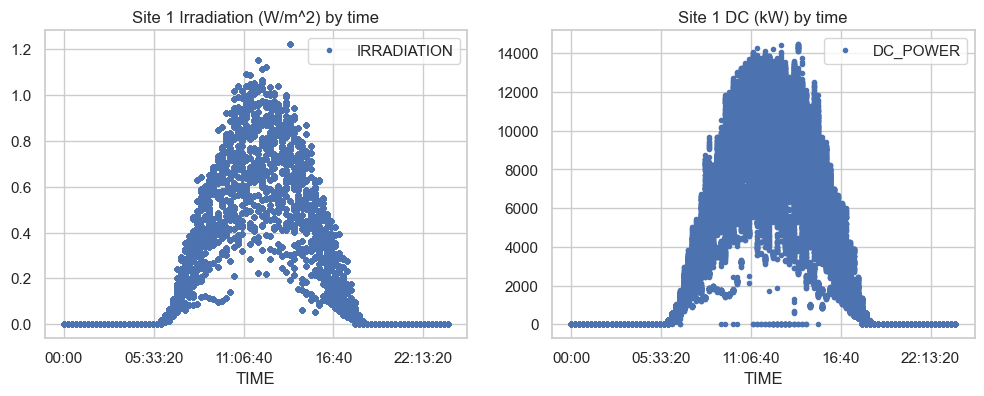

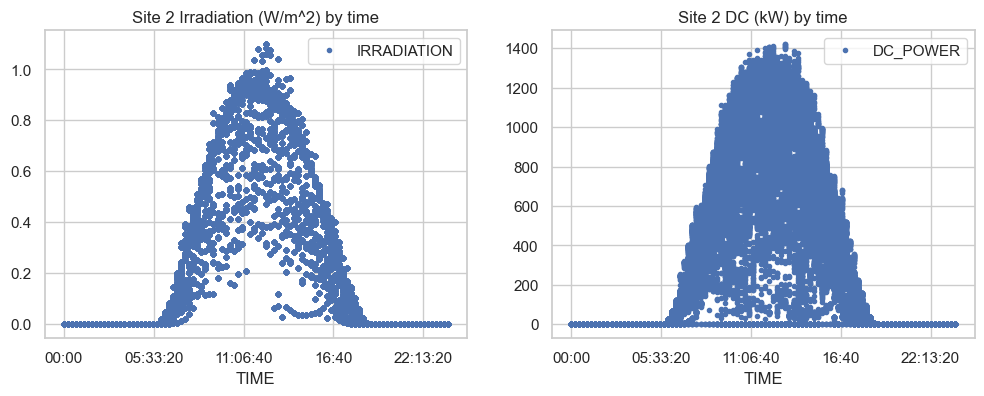

In [15]:
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(12,4))
m1.plot(x='TIME',y='IRRADIATION',style='.',title='Site 1 Irradiation (W/m^2) by time',ax=ax1)
m1.plot(x='TIME',y='DC_POWER',style='.',title='Site 1 DC (kW) by time',ax=ax2)

fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(12,4))
m2.plot(x='TIME',y='IRRADIATION',style='.',title='Site 2 Irradiation (W/m^2) by time',ax=ax1)
m2.plot(x='TIME',y='DC_POWER',style='.',title='Site 2 DC (kW) by time',ax=ax2)

As predicted, the shapes of the plots appear similar between irradiation and DC power at each site. Interestingly, the data for DC power seems more diffuse than the data for irradiation for a given site. Perhaps more important though is that while the plot density of the irradiation graphs is approximately equal (to the naked eye), the plot density of the DC power output for site 2 seems much higher (thus the data points are more spread out) than that of site 1. This may affect data analysis results later.

### Further correlations

The searborn data package allows for a quick way to compare correlations across all of the features for a given data set. The pair plot function is used to visualize these correlations for each site below.

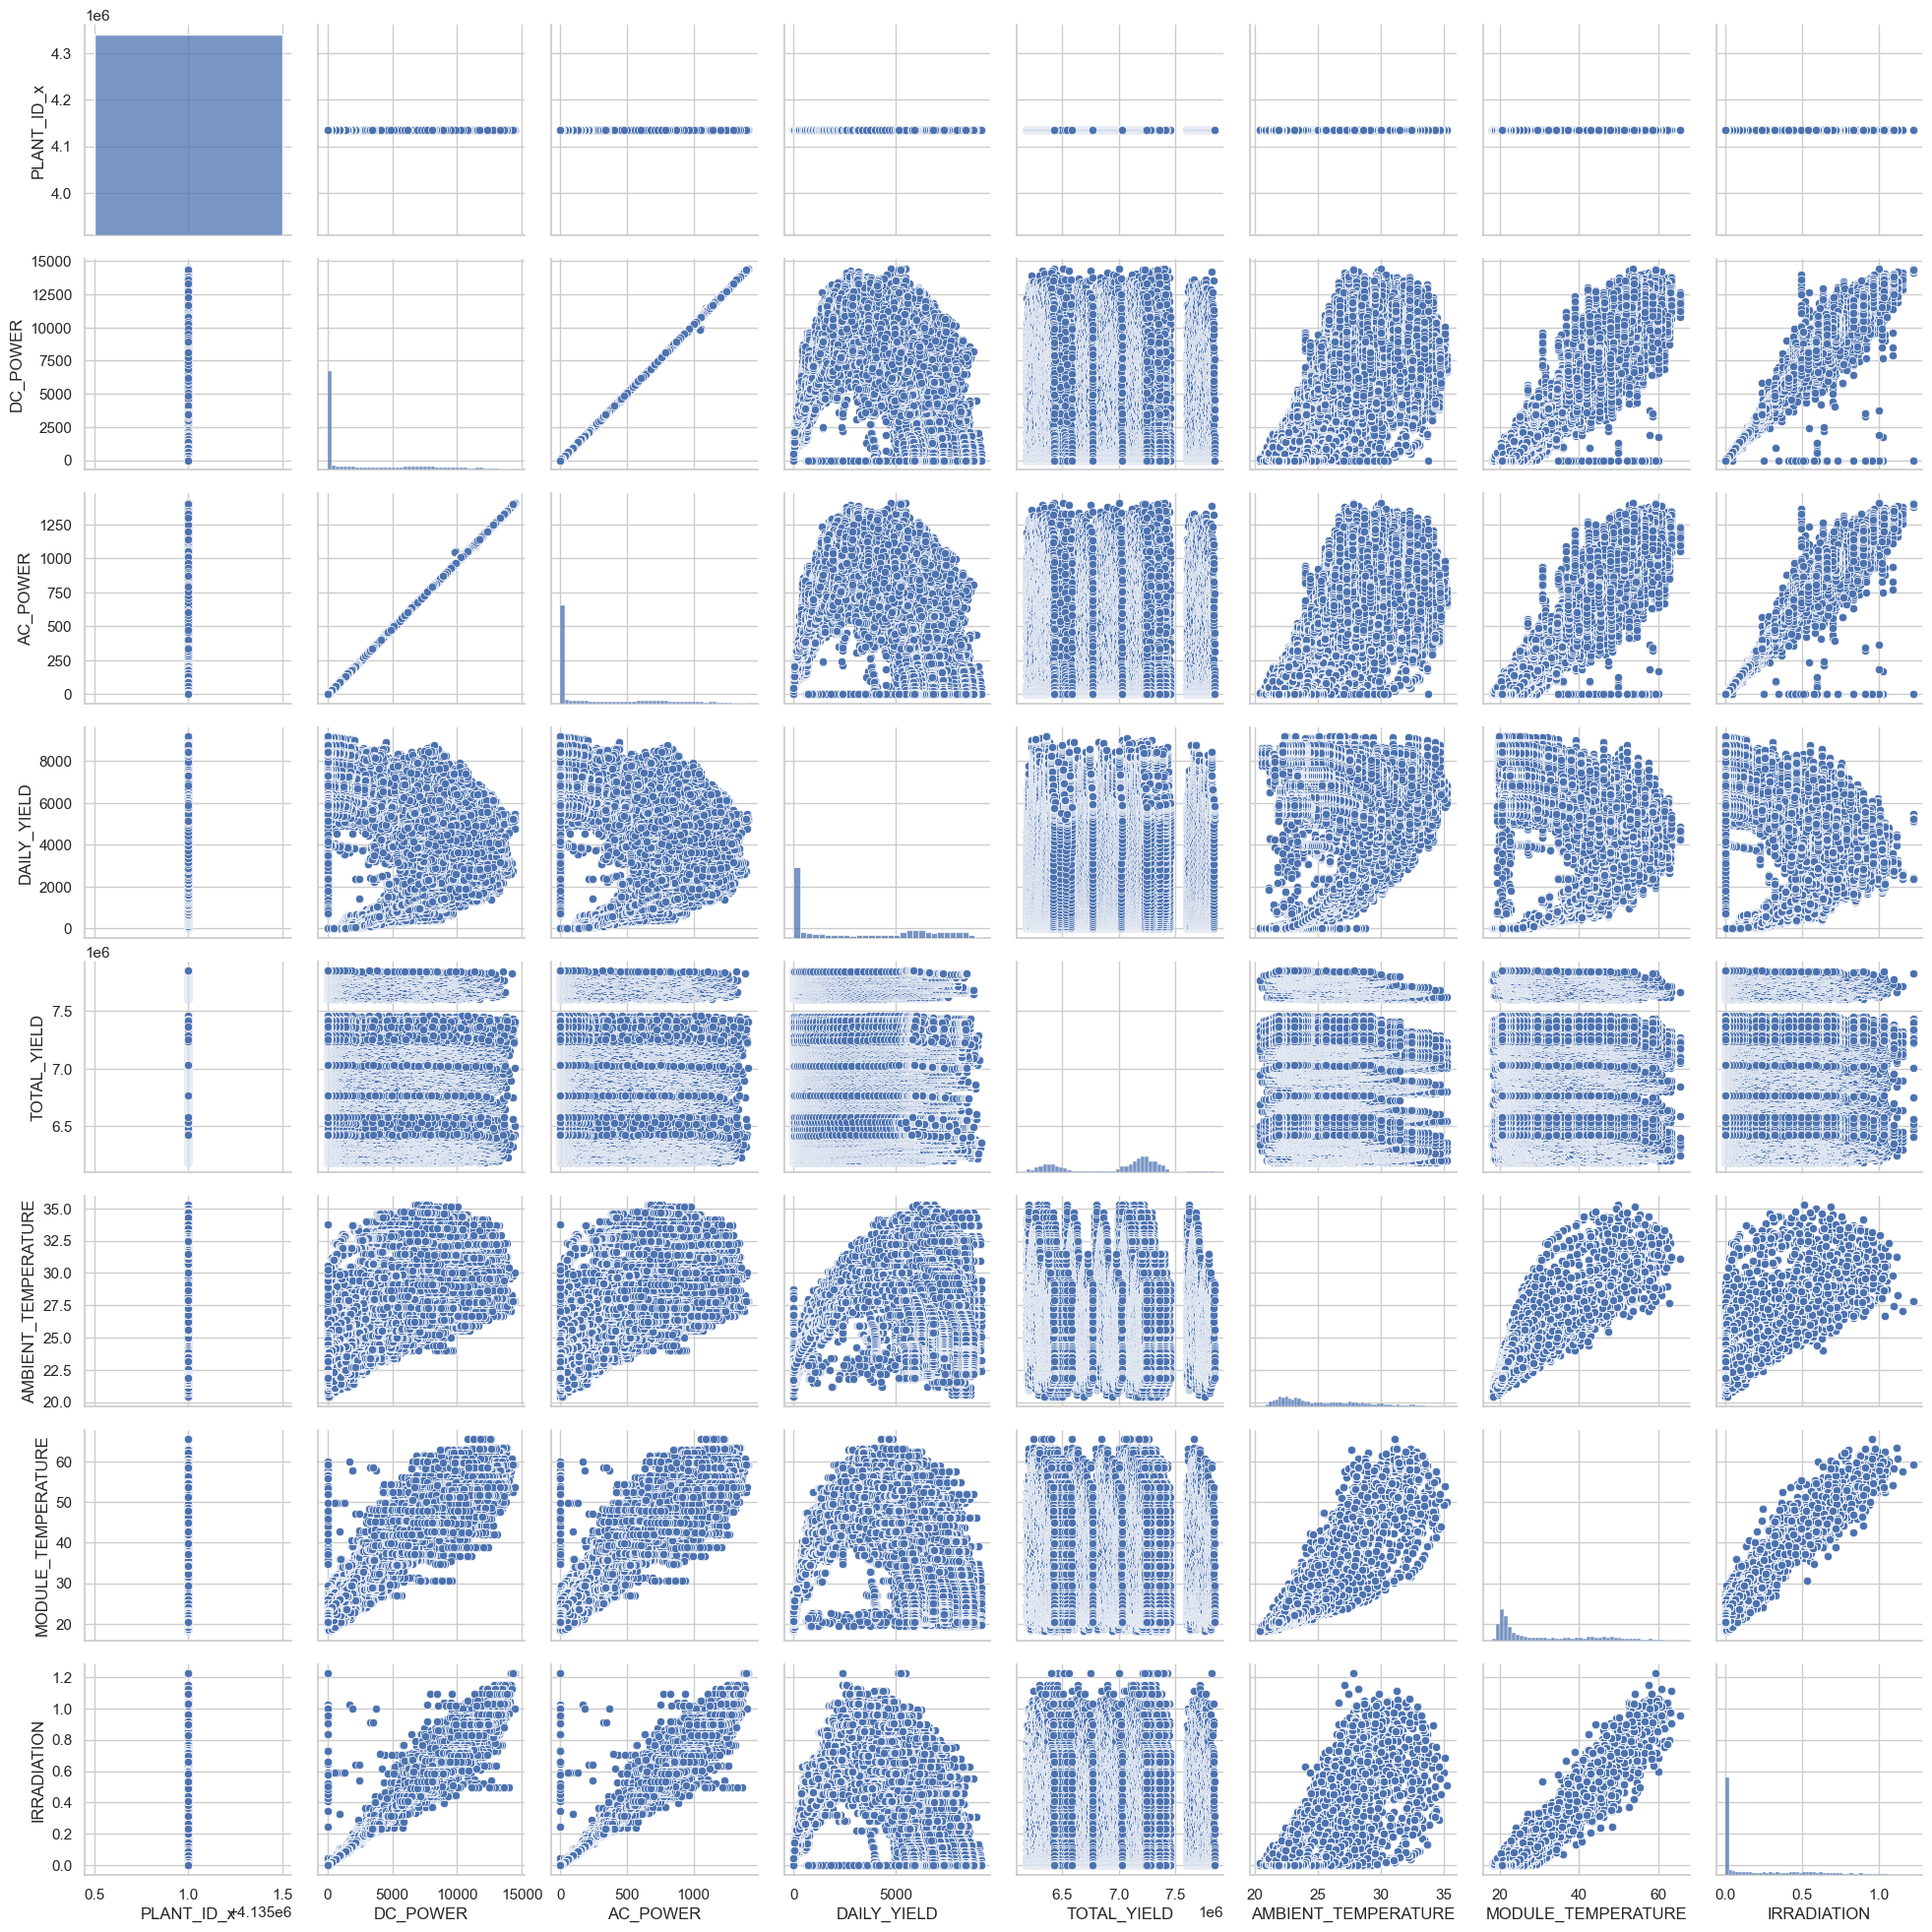

In [16]:
# Display site 1 pair plot to examine correlations
sns.pairplot(m1)

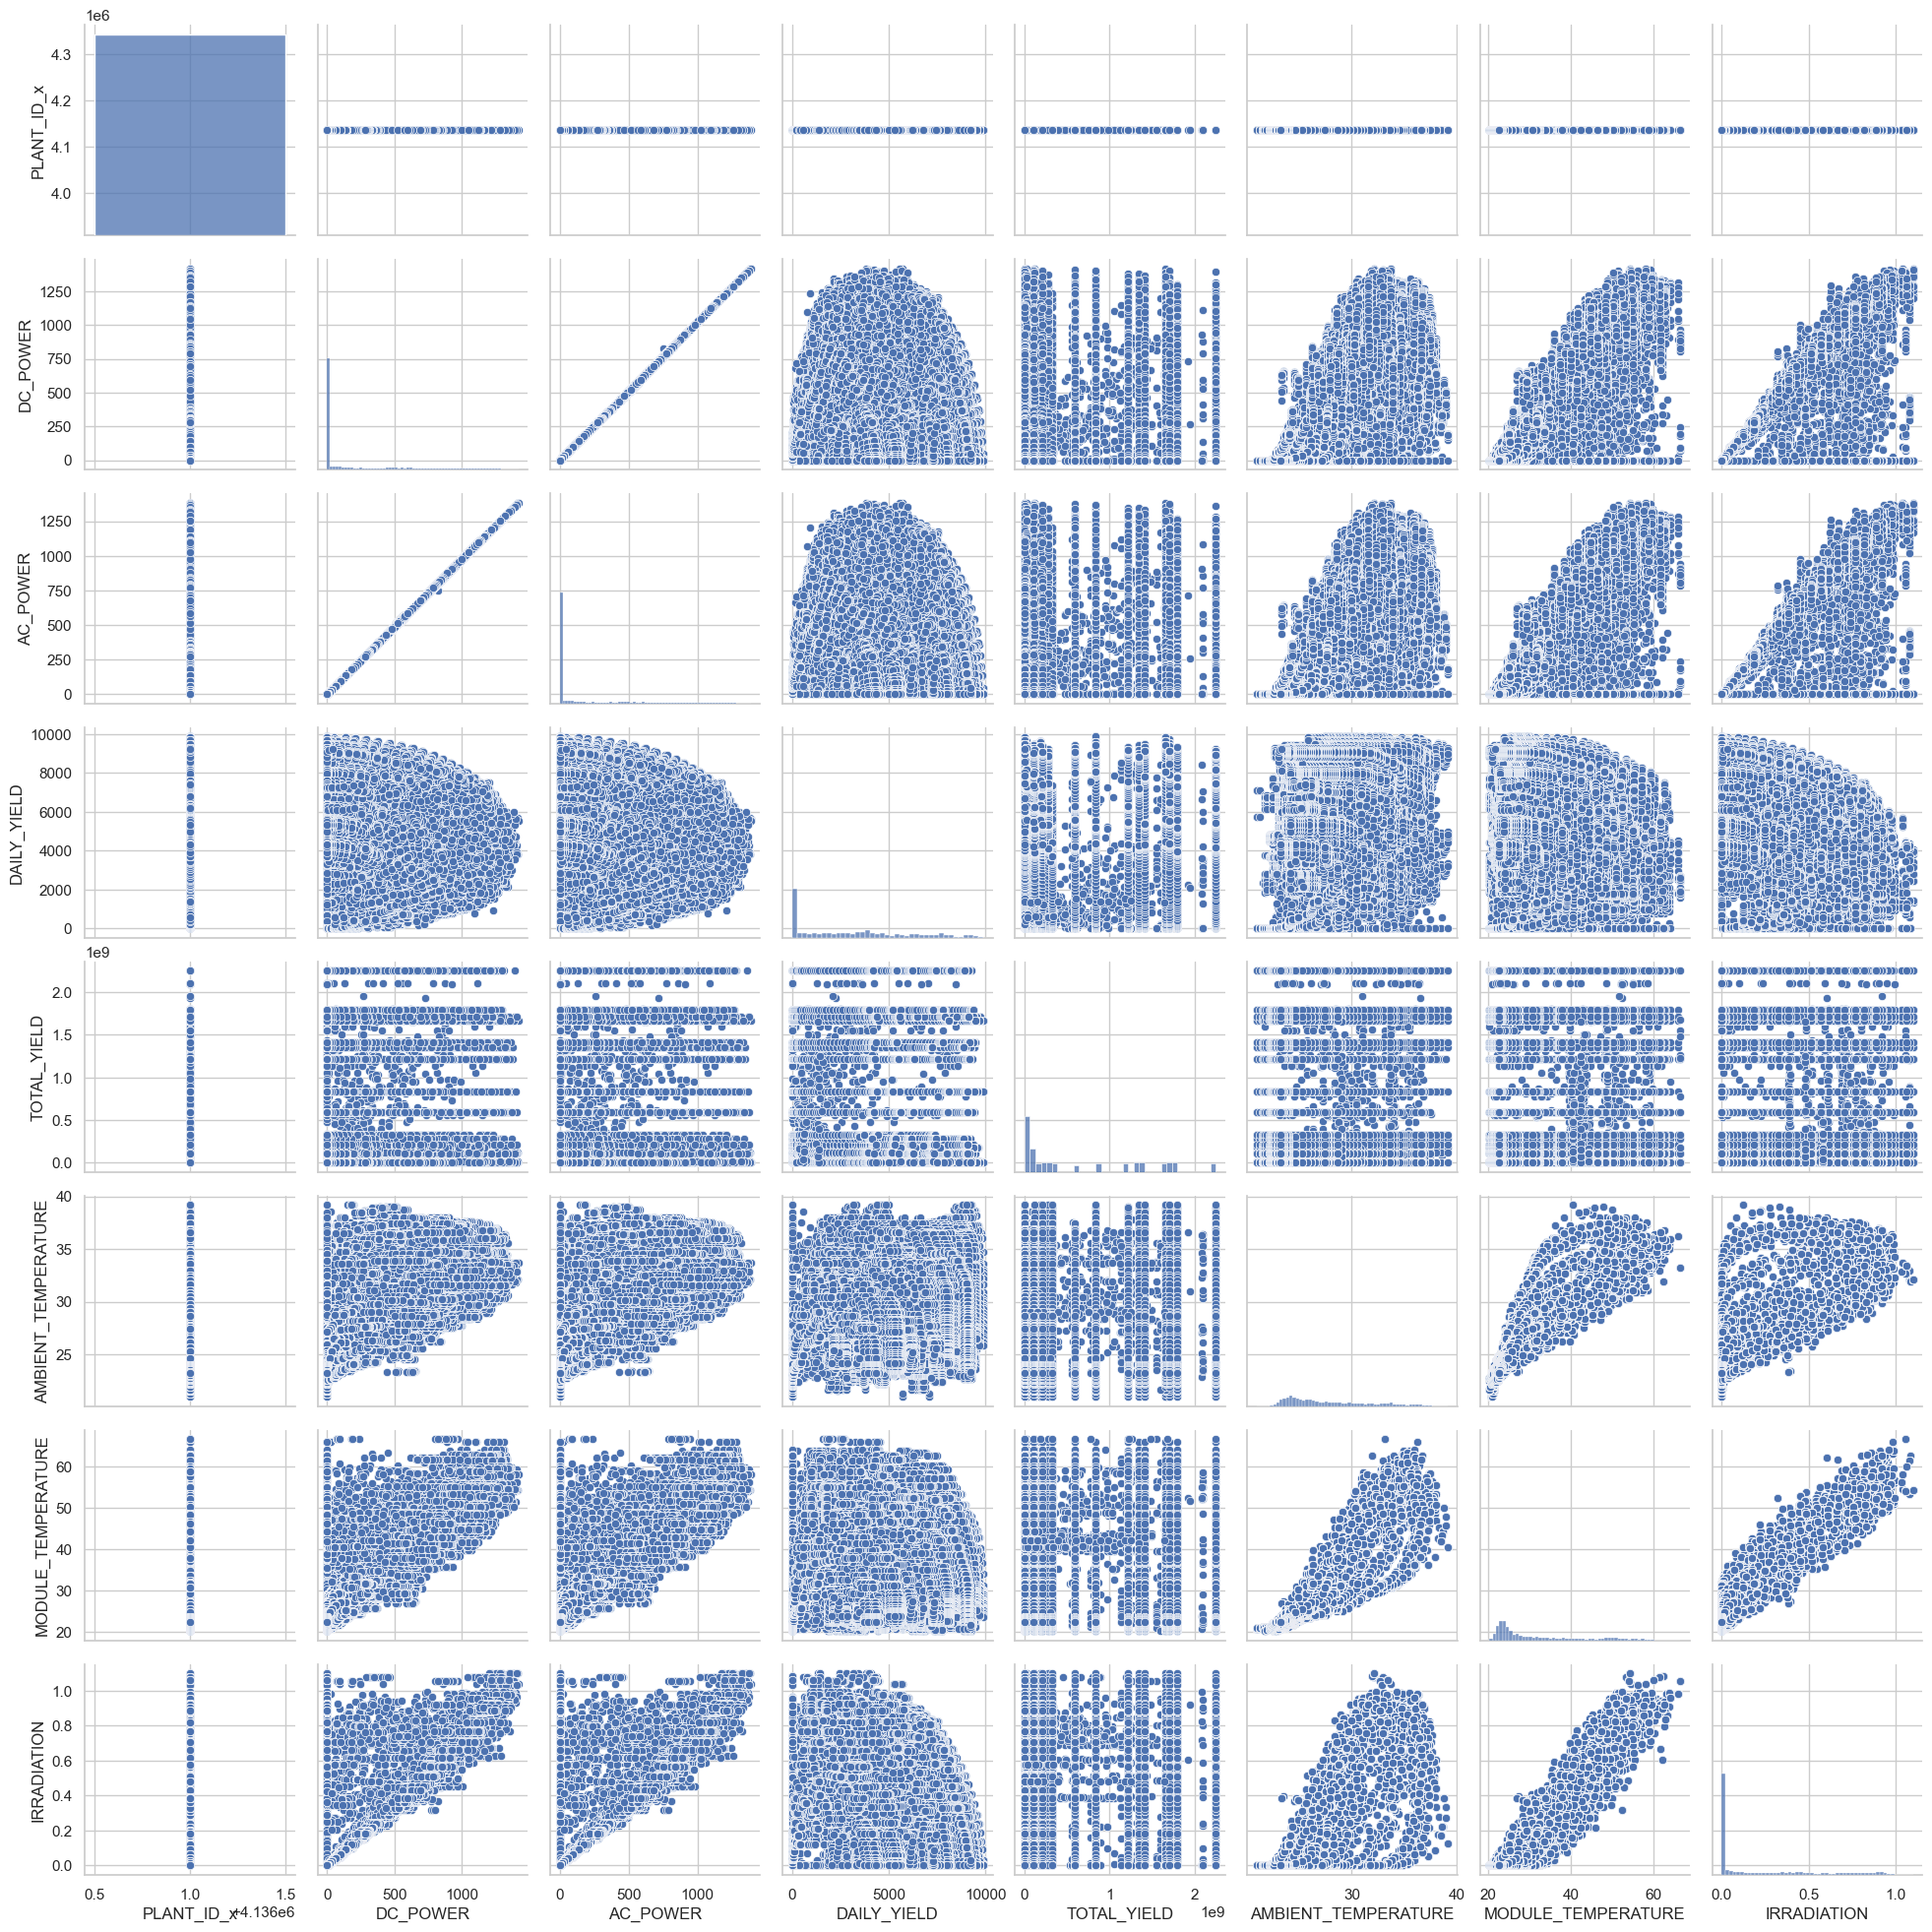

In [17]:
# Display site 2 pair plot to examine correlations
sns.pairplot(m2)

#### Heatmap Correlations
Another way to gain correlation data is to use a heatmap. Since the data has to be numeric to quantify correlations, the plant id and source key features are dropped from the datasets.

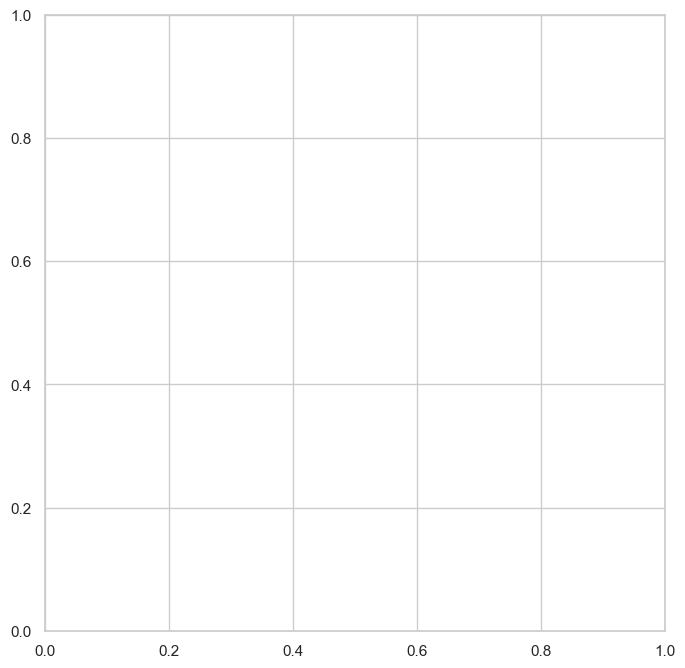

In [19]:
# Create heatmap correlations for site 1
m1_red = m1.drop(['PLANT_ID_x','SOURCE_KEY_x'],axis=1)
m2_red = m2.drop(['PLANT_ID_x','SOURCE_KEY_x'],axis=1)
fig1,ax1=plt.subplots(figsize=(8,8))



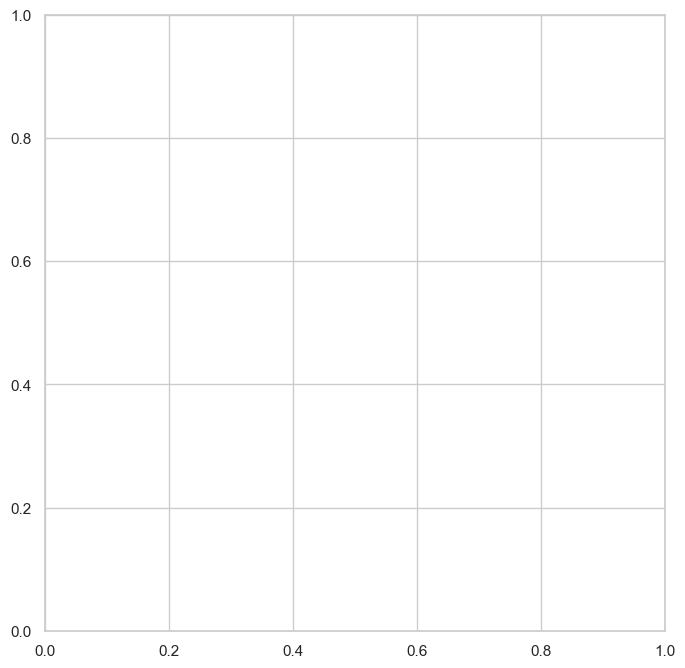

In [21]:
# Create Heatmap correlation for site 2
fig2,ax2=plt.subplots(figsize=(8,8))


The most important correlations to DC Power are module temperature, irradiation and ambient temperature. DC power is selected as the primary output over AC power for 2 reasons. It was clear from the initial data examination that not all DC power is being converted to AC power (though we may not know why) and, assuming that all DC power was converted to AC power, the values of the AC power feature should be a simple linear transformation of the DC power outputs values, multiplied by the inverter efficiency.

# Predictive model

With exploratory data analysis complete, predictive models can be created for these data. Several different models are examined here. Here, we import the modules we need for predictive analysis (though this could be done in the first step also) and then dataframes have their features reduced even further, limiting them to just the module temperature, irradiation, ambient temperature and the DC Power output. This will presumably give a faster, more efficient model without worrying about collinearity or misleading predictions due to excess information.

In [22]:
# import models for machine learning

from sklearn.preprocessing import scale
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import datetime as dt

## Feature Engineering
Despite the fact that DC power output is most closly correlated to irraditation for Site 1 and for Site 2, it is worth considering the ease at which this data is available for use. Irradiation data is probably not on the average person's weekly forecast. What is on the weekly forecast is the ambient temperature for a given location. Looking back to the pair plots and the heatmap above, there is correlation between irradiation and ambient temperature.

Thinking this through, module temperature is most likely a dependent variable of environmental conditions, namely, what the ambient temperature is and how much irradiation there is. Actually irradiation is really the determining factor in ambient temperature as well. The more intense the irradiation at the site location, the warmer the ground and air will be. So both ambient and module temperatures could feasibly be predicted based on irradiation. If there is correlation between irradiation and temperature, then there is correlation between temperature and irradation. By the transitive property, it is reasonable to assume that a predictive model determining DC power output from each site could be created based on the ambient temperature of the site, which could be found by just about any person with an internet connection.

In [23]:
# Drop extra features that are not needed
m1_red = m1_red.drop(['AC_POWER','DAILY_YIELD','TOTAL_YIELD','DATE','TIME'],axis=1)
m2_red = m2_red.drop(['AC_POWER','DAILY_YIELD','TOTAL_YIELD','DATE','TIME'],axis=1)

Text(0, 0.5, 'DC Power (kW)')

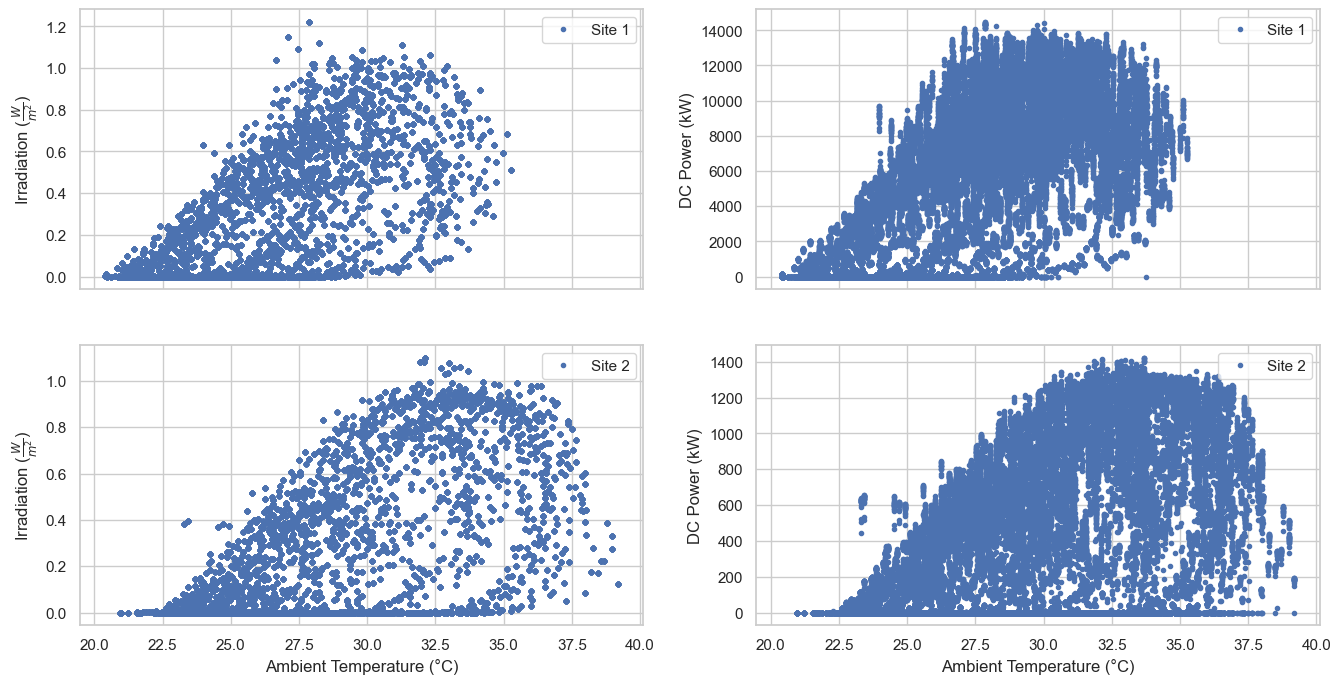

In [24]:
# Create plots of the ambient temperature and irradiation data for visualizing the correlation between the two

fig, axs = plt.subplots(2,2,figsize=(16,8),sharex=True)
m1_red.plot(x="AMBIENT_TEMPERATURE",y="IRRADIATION",style='.',label="Site 1",ax=axs[0,0])
m2_red.plot(x="AMBIENT_TEMPERATURE",y="IRRADIATION",style='.',label="Site 2",ax=axs[1,0])
axs[1,0].set_xlabel('Ambient Temperature (°C)')
axs[0,0].set_ylabel(r'Irradiation ($\frac{W}{m^2}$)')
axs[1,0].set_ylabel(r'Irradiation ($\frac{W}{m^2}$)')

m1_red.plot(x="AMBIENT_TEMPERATURE",y="DC_POWER",style='.',label="Site 1",ax=axs[0,1])
m2_red.plot(x="AMBIENT_TEMPERATURE",y="DC_POWER",style='.',label="Site 2",ax=axs[1,1])
axs[1,1].set_xlabel('Ambient Temperature (°C)')
axs[0,1].set_ylabel('DC Power (kW)')
axs[1,1].set_ylabel('DC Power (kW)')

### Linear Regression with Ambient Temperature Data

C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\1890977176.py:24: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axs[0].plot(m1.DATE_TIME.values,y1_pred,'r-',label='predicted')
C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\1890977176.py:25: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axs[1].plot(m2.DATE_TIME.values,y2_pred,'r-',label='predicted')


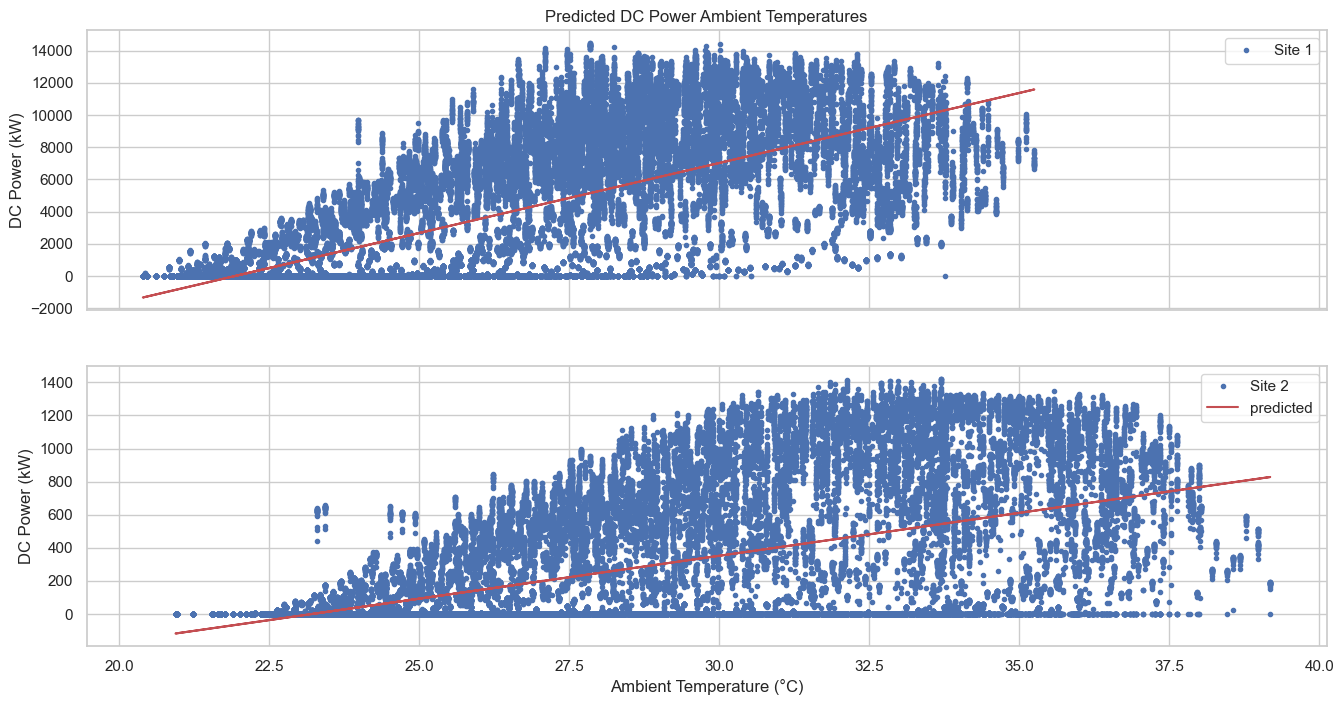

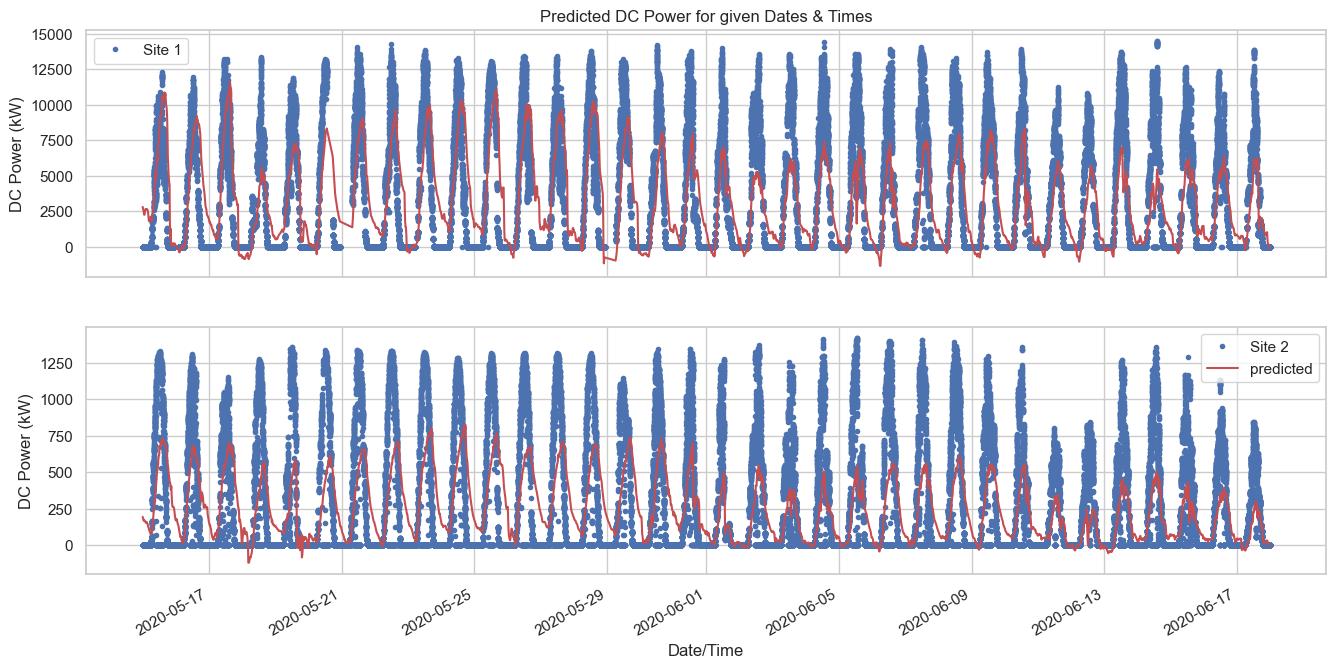

In [25]:
# Create linear regression models for DC power based on ambient temperature
reg1=LinearRegression().fit(m1.AMBIENT_TEMPERATURE.values.reshape(-1,1),m1.DC_POWER.values)
reg2=LinearRegression().fit(m2.AMBIENT_TEMPERATURE.values.reshape(-1,1),m2.DC_POWER.values)
# Predict the values based on the inputs
y1_pred =reg1.predict(m1.AMBIENT_TEMPERATURE.values.reshape(-1,1))
y2_pred =reg2.predict(m2.AMBIENT_TEMPERATURE.values.reshape(-1,1))

# Plot results
fig,axs = plt.subplots(2,1,figsize=(16,8),sharex=True)
m1_red.plot(x="AMBIENT_TEMPERATURE",y="DC_POWER",style='.',label="Site 1",ax=axs[0])
m2_red.plot(x="AMBIENT_TEMPERATURE",y="DC_POWER",style='.',label="Site 2",ax=axs[1])
axs[0].plot(m1.AMBIENT_TEMPERATURE.values,y1_pred,'r-',label='predicted')
axs[1].plot(m2.AMBIENT_TEMPERATURE.values,y2_pred,'r-',label='predicted')
axs[1].set_xlabel('Ambient Temperature (°C)')
axs[0].set_title('Predicted DC Power Ambient Temperatures')
axs[0].set_ylabel('DC Power (kW)')
axs[1].set_ylabel('DC Power (kW)')
plt.legend()

fig,axs = plt.subplots(2,1,figsize=(16,8),sharex=True)
m1_red.plot(x="DATE_TIME",y="DC_POWER",style='.',label="Site 1",ax=axs[0])
m2_red.plot(x="DATE_TIME",y="DC_POWER",style='.',label="Site 2",ax=axs[1])
axs[0].set_title('Predicted DC Power for given Dates & Times')
axs[0].plot(m1.DATE_TIME.values,y1_pred,'r-',label='predicted')
axs[1].plot(m2.DATE_TIME.values,y2_pred,'r-',label='predicted')
axs[1].set_xlabel('Date/Time')
axs[0].set_ylabel('DC Power (kW)')
axs[1].set_ylabel('DC Power (kW)')
plt.legend()

After creating the model based on ambient temperature, it's important to determine the quality of the model. So, how accurate is the model at predicting DC Power output based on ambient temperature. Well, it's a little tough to tell. The $R^2$ value for DC Power prediction based on the ambient temperature is not great at either site. But, the goal isn't *exactly* to predict the DC Power from the ambient temperature. The goal of this model is to predict what the DC Power output would be on a given day when a user *knows* the ambient temperature for that day. This actually requires that a user have a forecast for the next day (or few days) and he or she can then put that information into this model and get a prediction of the power output. Again, since everyone has weather prediction power at their fingertips this is perhaps feasible for the average person using this model. And while the sklearn linear regression model is used here, the same result could frankly be achieved with any linear regression estimator, even in Excel. It's hardly machine learning. And, perhaps surprisingly to some, **that's ok!**. A successful predictive model does not have to incorporate machine learning.

But still, the task requested is to create a model that predicts DC power output on a given day. The model doesn't have to use just one feature. There are other options that can be used to predict the DC power output. First off, look at the graphs above: the general trend of the predictive model isn't far from the actual data. There are peaks in the predicted output where there are peaks in the expected output. There are a few pieces of the plot (like at 2020-05-29 at Site 2) where the predicted maybe going below 0, but that's ok for now. Those values can be normalized later. So this is "directionally" correct. But the peaks of the predicted model never seem to reach the peaks of the expected model. Quantifying this predicted data against the actual power output is as easy as calling the $R^2$ score.

In [26]:
print(fr'The R\u00b2 value for Site 1 is {r2_score(m1_red.DC_POWER,y1_pred):.3f}')
print(fr'The R\u00b2 value for Site 1 is {r2_score(m2_red.DC_POWER,y2_pred):.3f}')


The R\u00b2 value for Site 1 is 0.525
The R\u00b2 value for Site 1 is 0.317


Well, to say those are not great $R^2$ values is an understatement. Still, it's good to try to do prediction with readily available data. Now, at this point, you might be saying "WAIT! You didn't spilt the data, train the model, run the model against test data and see how it performs. Of course these predictions are bad!" And you're right... but this was just an attempt to see how close a very simple prediction can get. Is a linear regression enough? Can a single feature get a decent prediction? It is also important to know that splitting, training, and testing time series data is different than splitting, training, and testing other non-time series data. Random splits with time series data will lose the inherent sequential aspect of a time dependent relationship. 

Another feature to examine, given it's high correlation would be module temperature. Though this is likely to not be as useful in general predictions (as the module temperature must be measured and known), it is worth a brief examiniation here.

### Linear Regression with Module Temperature Data

Text(0, 0.5, 'DC Power (kW)')

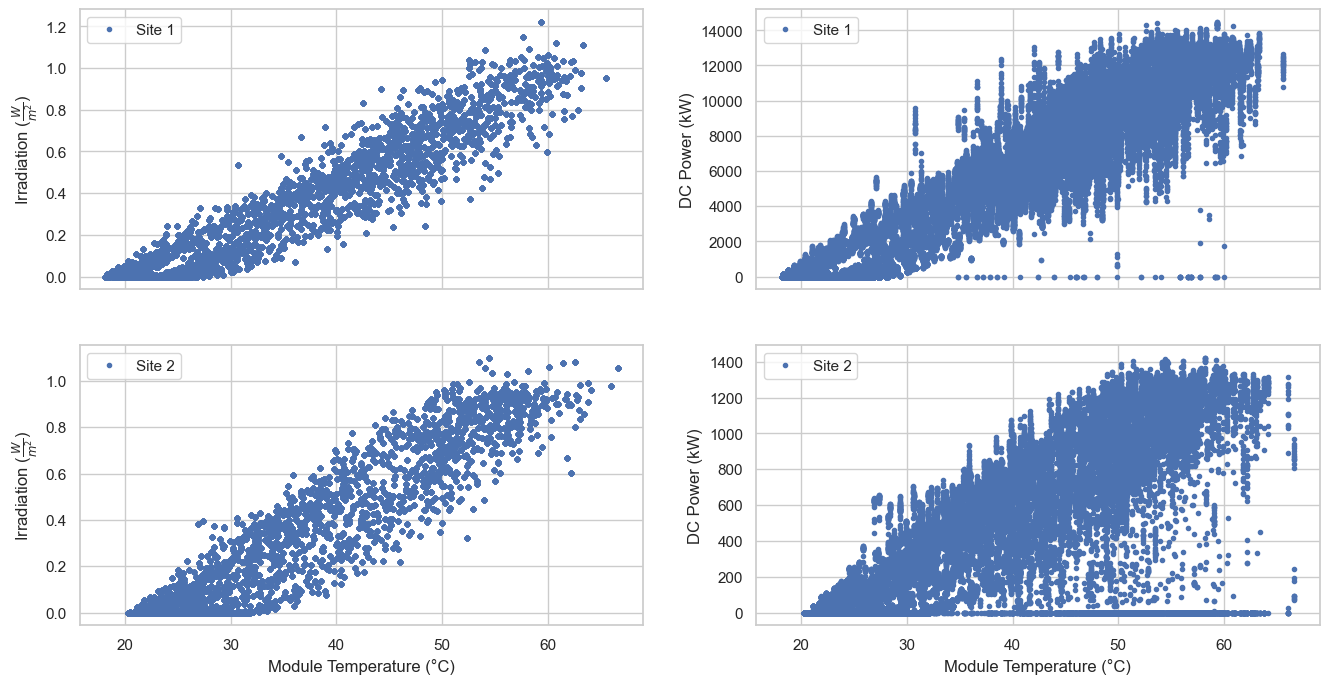

In [27]:
# Plot the dependencies of the module temperature
fig, axs = plt.subplots(2,2,figsize=(16,8),sharex=True)
m1_red.plot(x="MODULE_TEMPERATURE",y="IRRADIATION",style='.',label="Site 1",ax=axs[0,0])
m2_red.plot(x="MODULE_TEMPERATURE",y="IRRADIATION",style='.',label="Site 2",ax=axs[1,0])
axs[1,0].set_xlabel('Module Temperature (°C)')
axs[0,0].set_ylabel(r'Irradiation ($\frac{W}{m^2}$)')
axs[1,0].set_ylabel(r'Irradiation ($\frac{W}{m^2}$)')

m1_red.plot(x="MODULE_TEMPERATURE",y="DC_POWER",style='.',label="Site 1",ax=axs[0,1])
m2_red.plot(x="MODULE_TEMPERATURE",y="DC_POWER",style='.',label="Site 2",ax=axs[1,1])
axs[1,1].set_xlabel('Module Temperature (°C)')
axs[0,1].set_ylabel('DC Power (kW)')
axs[1,1].set_ylabel('DC Power (kW)')

There is some noise on the site 2 data as compared to the site 1 data. Perhaps there are some outliers that could be removed for general examination that would improve the performance. However, it is worth running a quick example to determine what the baseline model will provide.

For site 1, use the following equation to predict DC power output based on module temperature:
P (kW)=-6636.43* (Module Temperature [°C])+313.13
For site 2, use the following equation to predict DC power output based on module temperature:
P (kW)=-560.19* (Module Temperature [°C])+24.75


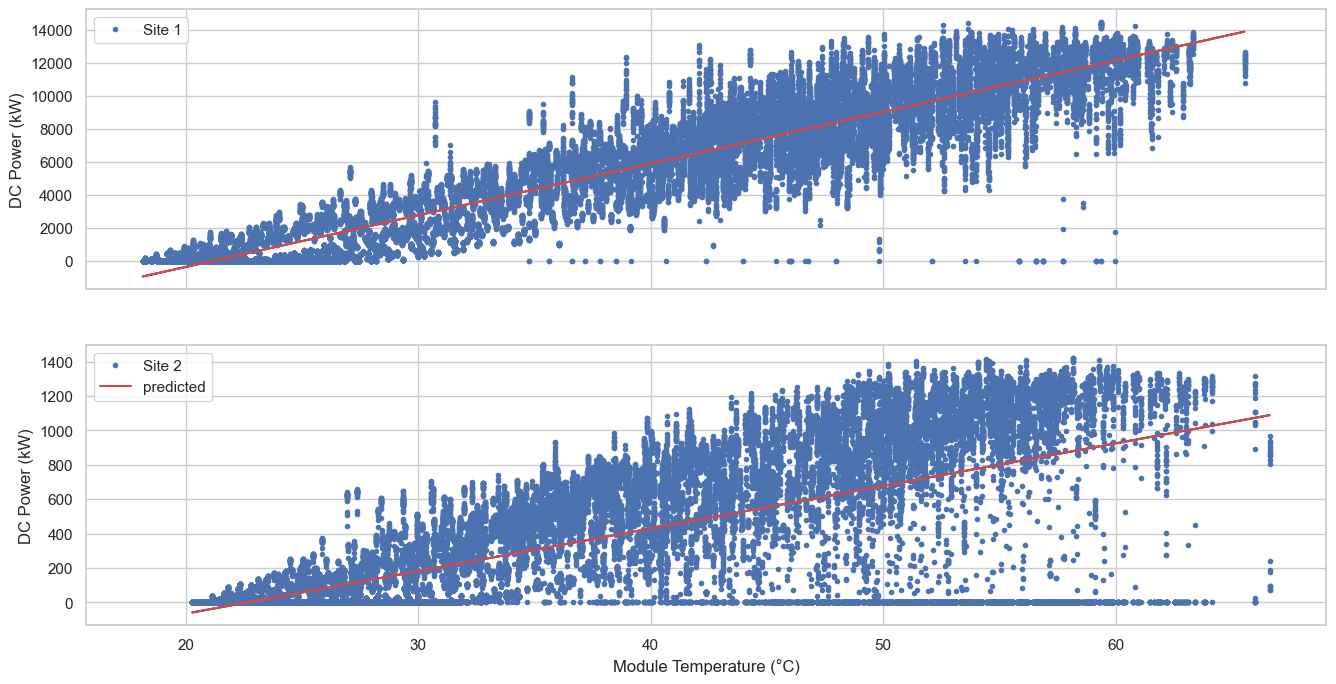

In [28]:
# Create a model
reg1_MT=LinearRegression().fit(m1.MODULE_TEMPERATURE.values.reshape(-1,1),m1.DC_POWER.values)
reg2_MT=LinearRegression().fit(m2.MODULE_TEMPERATURE.values.reshape(-1,1),m2.DC_POWER.values)

# Run predictions for all the data
y1_pred =reg1_MT.predict(m1.MODULE_TEMPERATURE.values.reshape(-1,1))
y2_pred =reg2_MT.predict(m2.MODULE_TEMPERATURE.values.reshape(-1,1))

# Plot the results
fig, axs = plt.subplots(2,1,figsize=(16,8),sharex=True)
m1_red.plot(x="MODULE_TEMPERATURE",y="DC_POWER",style='.',label="Site 1",ax=axs[0])
m2_red.plot(x="MODULE_TEMPERATURE",y="DC_POWER",style='.',label="Site 2",ax=axs[1])
axs[0].plot(m1.MODULE_TEMPERATURE.values,y1_pred,'r-',label='predicted')
axs[1].plot(m2.MODULE_TEMPERATURE.values,y2_pred,'r-',label='predicted')
axs[1].set_xlabel('Module Temperature (°C)')
axs[0].set_ylabel('DC Power (kW)')
axs[1].set_ylabel('DC Power (kW)')
plt.legend()

# Give the analysis results and regression equation data
print(f'For site 1, use the following equation to predict DC power output based on module temperature:\n'
      f'P (kW)={reg1_MT.intercept_:.2f}* (Module Temperature [°C])+{reg1_MT.coef_[0]:.2f}')


print(f'For site 2, use the following equation to predict DC power output based on module temperature:\n'
      f'P (kW)={reg2_MT.intercept_:.2f}* (Module Temperature [°C])+{reg2_MT.coef_[0]:.2f}')

C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\1830515864.py:6: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axs[0].plot(m1.DATE_TIME.values,y1_pred,'r-',label='predicted')
C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\1830515864.py:7: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axs[1].plot(m2.DATE_TIME.values,y2_pred,'r-',label='predicted')


The R\u00b2 value for Site 1 is 0.912
The R\u00b2 value for Site 1 is 0.562


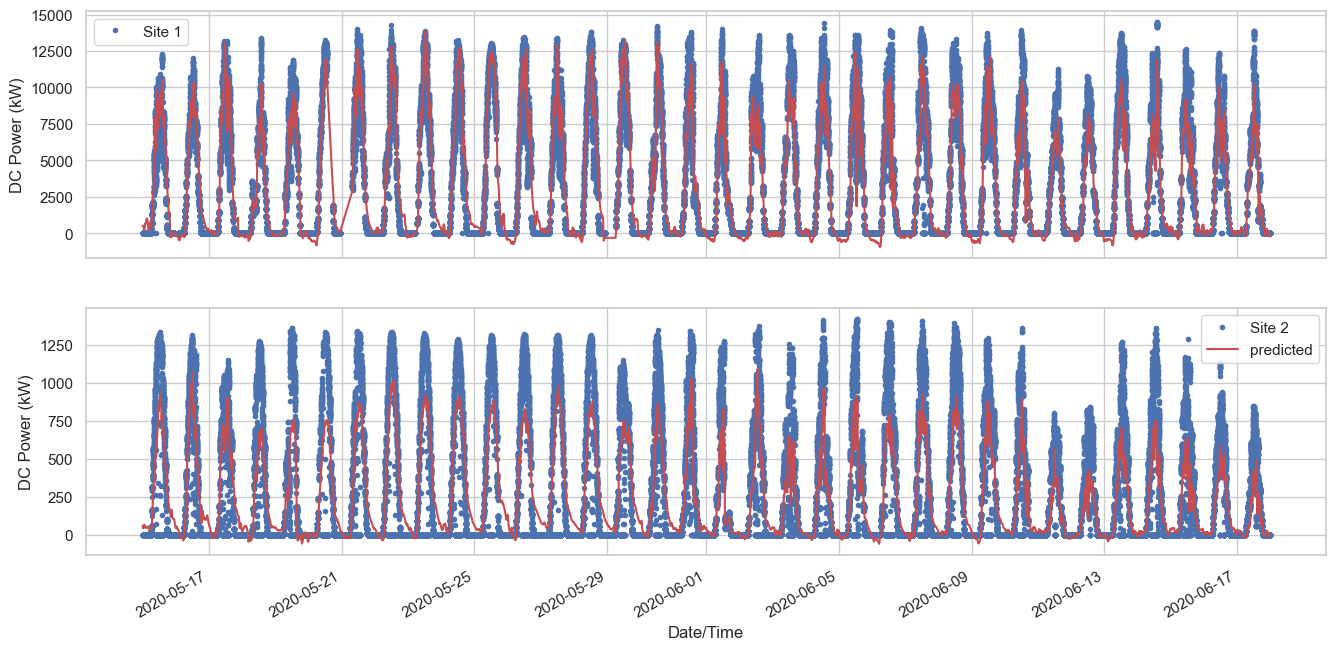

In [29]:
# Plot the results of the model against time

fig,axs = plt.subplots(2,1,figsize=(16,8),sharex=True)
m1_red.plot(x="DATE_TIME",y="DC_POWER",style='.',label="Site 1",ax=axs[0])
m2_red.plot(x="DATE_TIME",y="DC_POWER",style='.',label="Site 2",ax=axs[1])
axs[0].plot(m1.DATE_TIME.values,y1_pred,'r-',label='predicted')
axs[1].plot(m2.DATE_TIME.values,y2_pred,'r-',label='predicted')
axs[1].set_xlabel('Date/Time')
axs[0].set_ylabel('DC Power (kW)')
axs[1].set_ylabel('DC Power (kW)')
plt.legend()

# Print the R^2 correlation for the model results
print(fr'The R\u00b2 value for Site 1 is {r2_score(m1_red.DC_POWER,y1_pred):.3f}')
print(fr'The R\u00b2 value for Site 1 is {r2_score(m2_red.DC_POWER,y2_pred):.3f}')

The site 1 model has improved considerably from the model using ambient temperature as the primary feature. The site 2 model, however, has barely better predictive capability that a coin toss. Another issue to address is that neither of these models is actually dependent on time. That makes things a bit interesting because if someone wants to predict the power output based on temperature, he or she must know what the temperature will be. These two models essentially create a scenario in which the user of the model could look at a weather prediction and plug temperatures into the model to get a forecasted power. Interesting and potentially useful, but multiple steps are required on the part of the user.

Also, since the site 2 results are correlation is still very low. A more involved model using multiple parameters may yield better results. Also, it is probably time, given the multivariate nature of the data, that the data be split for time series analysis. Below, we will create a function to split the timeseries data as recommended here: 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

### Multivariate data models

In [30]:
def ts_split(X,y,test_size=0.25):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

#### Start with a linear regression model

In [31]:
# Site 1 Linear Regression Model
X1 = m1.loc[:,("DATE_TIME","AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION")]
y1 = m1["DC_POWER"]

X1['DATE_TIME']=X1['DATE_TIME'].map(dt.datetime.toordinal)

X1_train, X1_test, y1_train, y1_test = ts_split(X1,y1)

lr=LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred = lr.predict(X1_test)
print(lr.score(X1_test,y1_test))

0.9765538959825327


A linear regression model for the Site 1 data has again achieved a high $R^2$ score.

In [33]:
# Site 2 Linear Regression Model
X2_lm = m2.loc[:,("DATE_TIME","AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION")]
y2_lm = m2["DC_POWER"]

X2_lm['DATE_TIME']=X2_lm['DATE_TIME'].map(dt.datetime.toordinal)

X2_train_lm, X2_test_lm, y2_train_lm, y2_test_lm = ts_split(X2_lm,y2_lm)

lr2 = LinearRegression()
lr2.fit(X2_train_lm,y2_train_lm)
y2_pred_lm = lr2.predict(X2_test_lm)
print(lr2.score(X2_test_lm,y2_test_lm))

y2_full_pred_lm = lr2.predict(X2_lm)


0.6222267234250619


The multivariate linear regression model for site 2 is better but still not good. An attempt to optimize this model can be made (next steps), the data can be examined and cleaned for outliers, the features can be further engineered to get better predictive capability, or a neural network may be required to do more in depth analysis. Generally, it is a good idea to start with the simpliest solutions and advance the complexity as needed, so the next several steps will optimize the model with a Grid Search Cross Validation. It is important to clarify that the cross-validation method here is one for Time Series Splits, which can be further researched here:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

### Gradient Boost Model

In [34]:
X2 = m2.loc[:,("DATE_TIME","AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION")]
y2 = m2["DC_POWER"]

X2['DATE_TIME']=X2['DATE_TIME'].map(dt.datetime.toordinal)

X2_train, X2_test, y2_train, y2_test = ts_split(X2,y2)

# Create a parameter set and run a gradient boost model
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
         'loss':'huber'}
model1 = GradientBoostingRegressor(**params)
model2 = GradientBoostingRegressor(**params)
model1.fit(X1_train,y1_train)
model2.fit(X2_train,y2_train)

y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

Regression score for Site 1 = 0.98
MSE for Site 1 = 256594.73
Regression score for Site 2 = 0.61
MSE for Site 2 = 30091.62


C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\2064094176.py:10: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axs[0].plot(m1.DATE_TIME.values,model1.predict(X1),'r-',label='predicted')
C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\2064094176.py:11: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axs[1].plot(m2.DATE_TIME.values,model2.predict(X2),'r-',label='predicted')


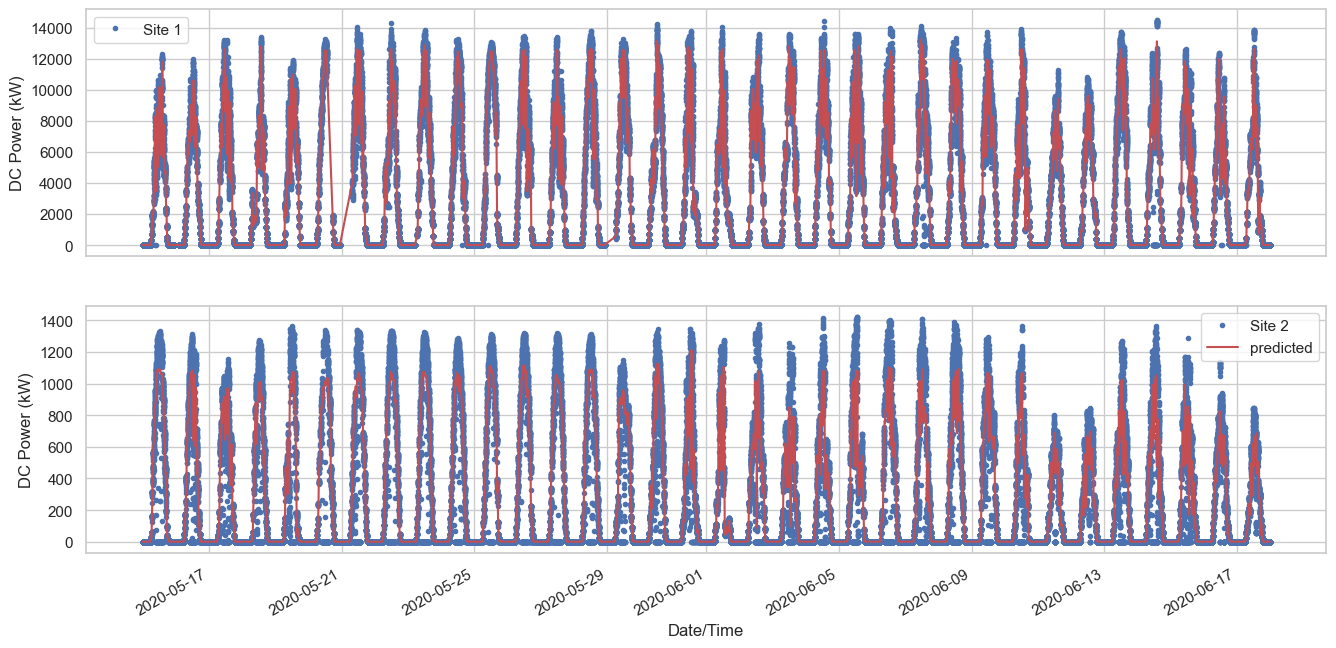

In [35]:
# Print and plot results
print(f'Regression score for Site 1 = {r2_score(y1_pred,y1_test):.2f}')
print(f'MSE for Site 1 = {mean_squared_error(y1_pred,y1_test):.2f}')
print(f'Regression score for Site 2 = {r2_score(y2_pred,y2_test):.2f}')
print(f'MSE for Site 2 = {mean_squared_error(y2_pred,y2_test):.2f}')

fig,axs = plt.subplots(2,1,figsize=(16,8),sharex=True)
m1_red.plot(x="DATE_TIME",y="DC_POWER",style='.',label="Site 1",ax=axs[0])
m2_red.plot(x="DATE_TIME",y="DC_POWER",style='.',label="Site 2",ax=axs[1])
axs[0].plot(m1.DATE_TIME.values,model1.predict(X1),'r-',label='predicted')
axs[1].plot(m2.DATE_TIME.values,model2.predict(X2),'r-',label='predicted')
axs[1].set_xlabel('Date/Time')
axs[0].set_ylabel('DC Power (kW)')
axs[1].set_ylabel('DC Power (kW)')
plt.legend()

Well, the site 1 prediction still has a high correlation. The site 2 prediction model correlation is still barely better than 60%. The time series plot above shows the gradient boosting regression is doing a pretty good job matching the the pattern of the actual DC power output but there seems to be a cap on how high the DC power prediction can be and that is where the variation between the predicted and acutal data is most clear. The  next step is to try and optimize the gradient boosting operation for site 2. A time series split is used in the grid search so as not to accidentally introduce stochastic randomization.

#### Gradient Boost Optimization

In [36]:
# Conduct optimization on gradient boost model
param_grid = {'learning_rate':[.1,.01,.001],'max_depth':[8,16,24,32]}
tscv = TimeSeriesSplit(n_splits=5)
mod_2 = GridSearchCV(
    GradientBoostingRegressor(),
    cv=tscv,
    param_grid=param_grid,
    verbose=1,
    n_jobs=-1)
mod_2.fit(X2_train,y2_train)
print(mod_2.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'learning_rate': 0.1, 'max_depth': 8}


In [37]:
# Run prediction and test on new models
model2 = GradientBoostingRegressor(**mod_2.best_params_)
model2.fit(X2_train,y2_train)
y2_pred = model2.predict(X2_test)
print(f'Regression score for Site 2 = {r2_score(y2_pred,y2_test):.2f}')
print(f'MSE for Site 2 = {mean_squared_error(y2_pred,y2_test):.2f}')


Regression score for Site 2 = 0.58
MSE for Site 2 = 26228.17


C:\Users\LOQ\AppData\Local\Temp\ipykernel_27820\2050647346.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax2.plot(m2.DATE_TIME.values,model2.predict(X2),'r-',label='predicted')


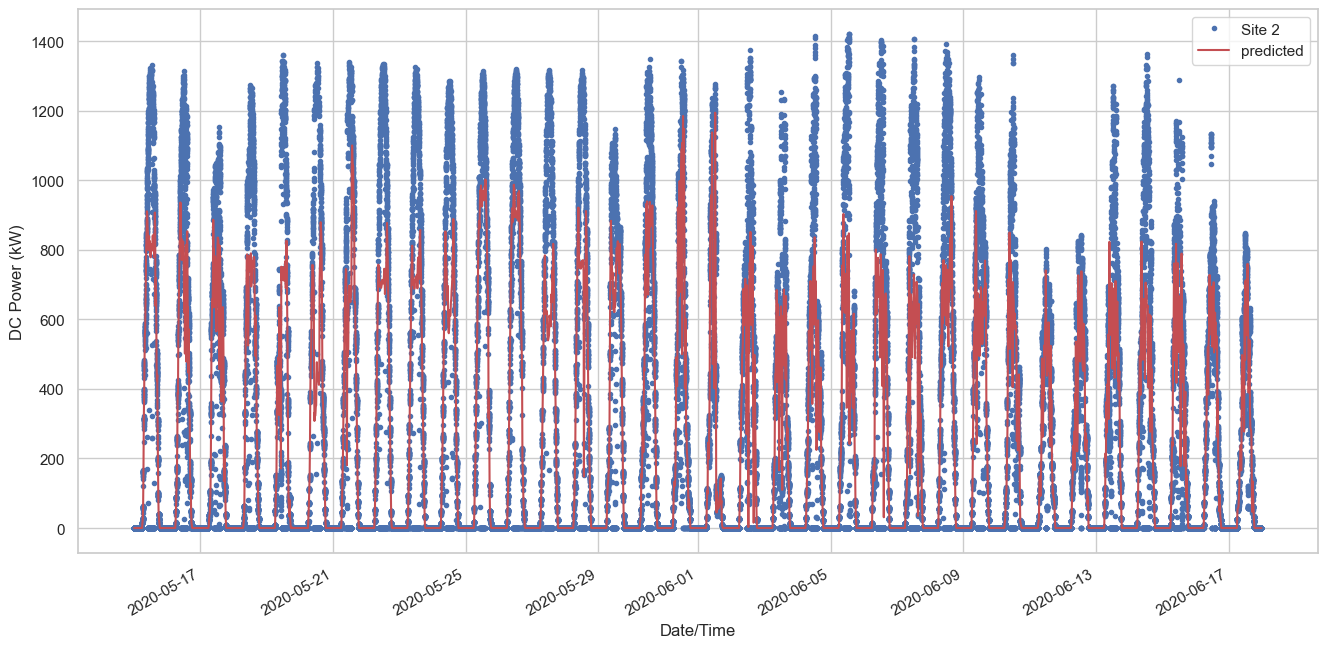

In [38]:
# Plot results
fig,ax2 = plt.subplots(figsize=(16,8))
m2_red.plot(x="DATE_TIME",y="DC_POWER",style='.',label="Site 2",ax=ax2)
ax2.plot(m2.DATE_TIME.values,model2.predict(X2),'r-',label='predicted')
ax2.set_xlabel('Date/Time')
ax2.set_ylabel('DC Power (kW)')
plt.legend()

Well, that still didn't really improve the prediction, which is frusterating but happens. There are really only two options now. One of the options is to clean up the data or to try a deep learning neural network. Cleaning the data will involve removing outliers mostly, but it is also worth looking at which features are the most important in the model. Feature engineering iis always interesting to identify the most important parameters in a predictions set. Since most of the work to identify important features is largely complete, it is worth starting there. From this point forward, everything will be regarding the Site 2 Data, unless otherwise noted. 

### Feature Importance Identification

Text(0.5, 1.0, 'Feature Importance (MDI)')

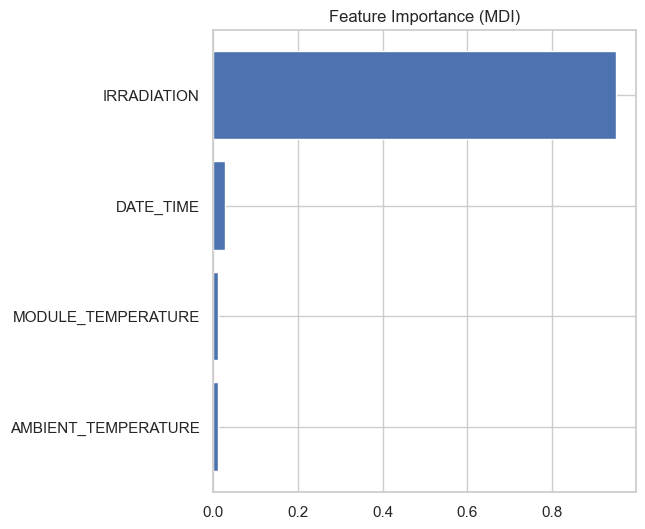

In [39]:
fi = model2.feature_importances_
sorted_idx = np.argsort(fi)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, fi[sorted_idx], align='center')
plt.yticks(pos, np.array(X2.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

Irradiation is clearly the most important feature. However, looking back at the pairplot showing DC Power as a function of irradiance, it looks like there's almost no correlation (below). The relationship is shown below, again, for clarity.

<Axes: xlabel='IRRADIATION', ylabel='DC_POWER'>

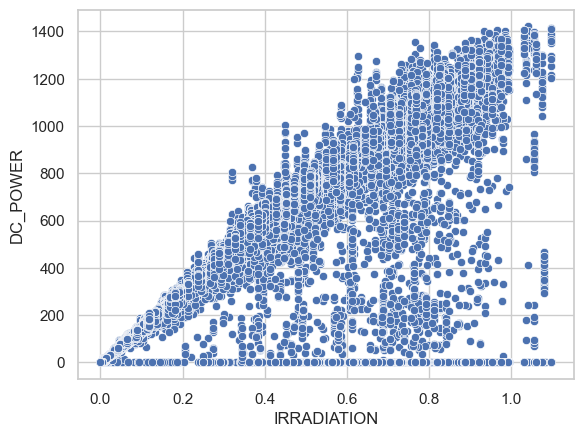

In [40]:
sns.scatterplot(x='IRRADIATION',y='DC_POWER',data=m2)

### Outlier removal
It may be worth cleaning the data relating DC power to irradiation going forward. Of course, another good place to look for data cleaning opportunities is just in the DC Power label. Here, there are over 3000 values that are outliers, according to a IQR analysis.

(array([  884,   887,   893, ..., 64501, 64505, 64507], shape=(3079,)),)
There are approximately outliers 3079 in the DC Power label
                        DATE_TIME     DC_POWER  AMBIENT_TEMPERATURE  \
count                        3079  3079.000000          3079.000000   
mean   2020-05-27 23:21:34.316336  1221.215327            33.378766   
min           2020-05-15 10:00:00  1116.513333            28.538208   
25%           2020-05-21 13:00:00  1170.627857            31.986550   
50%           2020-05-26 12:15:00  1218.833333            33.371868   
75%           2020-06-04 11:45:00  1268.152381            34.844951   
max           2020-06-16 11:30:00  1420.933333            37.497076   
std                           NaN    62.096550             1.838896   

       MODULE_TEMPERATURE  IRRADIATION  
count         3079.000000  3079.000000  
mean            54.885977     0.891138  
min             41.651166     0.618060  
25%             52.037946     0.846723  
50%             55.112

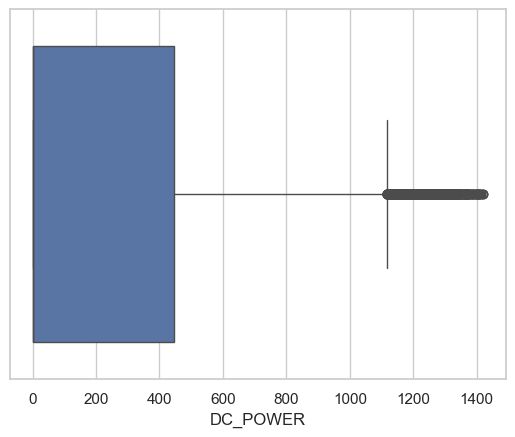

In [41]:
# Show a box plot and identify the number of DC power outliers
ax1 = sns.boxplot(x=m2_red.DC_POWER)
Q1 = np.percentile(m2_red['DC_POWER'],25)
Q3 = np.percentile(m2_red['DC_POWER'],75)
IQR = Q3-Q1

outlier_locs=np.where(m2_red['DC_POWER']>Q3+1.5*IQR)
print(outlier_locs)
print(f'There are approximately outliers {len(outlier_locs[0])} in the DC Power label')

outliers = m2_red.iloc[outlier_locs[0],:]
print(outliers.describe())

df = m2_red.drop(outlier_locs[0],axis=0)
df['DATE_TIME'] = df['DATE_TIME'].map(dt.datetime.toordinal)
X = df.drop(['DC_POWER'],axis=1)
y = df['DC_POWER']

X_train, X_test, y_train, y_test = ts_split(X,y)

model2 = GradientBoostingRegressor(**mod_2.best_params_)
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)
y_full_pred = model2.predict(X)

print(f'Regression score for Site 2 = {r2_score(y_pred,y_test):.5f}')
print(f'MSE for Site 2 = {mean_squared_error(y_pred,y_test):.5f}')

Unfortunately, that really didn't help with predicting the DC power output for site. Visualizing the residules of the irradiation and DC power output may reveal some idea of where there are outliers. Another visualization to example would be DC Power residuals vs dates and times.

In [42]:
# Convert the date time to ordinals again
m2_red.DATE_TIME = m2_red.DATE_TIME.map(dt.datetime.toordinal)

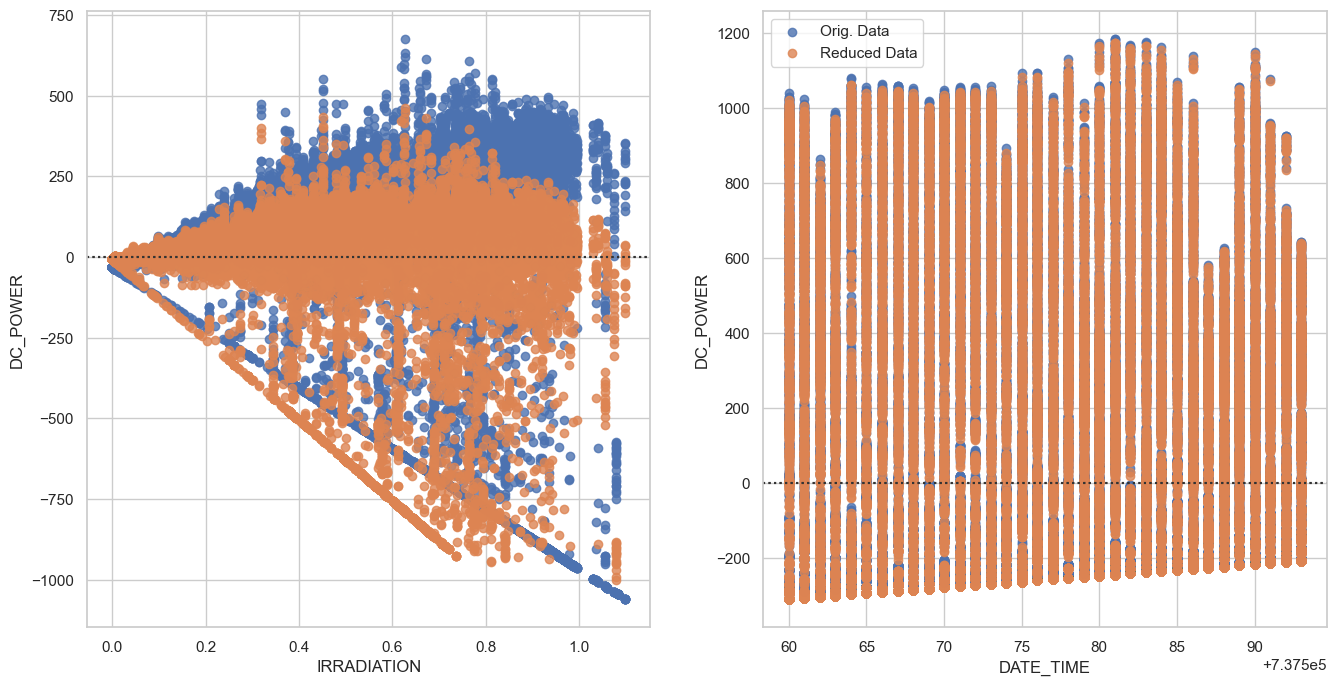

In [43]:
# Create a data copy and plot the residuals.
df = m2_red.copy(deep=True)
fig,ax = plt.subplots(1,2,figsize=(16,8))
sns.residplot(data=df,x='IRRADIATION',y='DC_POWER',ax=ax[0],label='Orig. Data')
sns.residplot(data=df,x='DATE_TIME',y='DC_POWER',ax=ax[1], label='Orig. Data')
residuals = df.DC_POWER-y2_full_pred_lm

# Identify the upper and lower limits accepted for the residuals
factor = 3
upper_lim = residuals.mean()+residuals.std()*factor
lower_lim = residuals.mean()-residuals.std()*factor

upper_loc=np.where(residuals>upper_lim)[0]
lower_loc=np.where(residuals<lower_lim)[0]

# Drop data outside the outlier range
df=df.drop(upper_loc,axis=0)
df=df.drop(lower_loc,axis=0)

# Plot the new residuals over the old residuals
sns.residplot(data=df,x='IRRADIATION',y='DC_POWER',ax=ax[0], label='Reduced Data')
sns.residplot(data=df,x='DATE_TIME',y='DC_POWER',ax=ax[1], label="Reduced Data")
plt.legend()

In [44]:
# Rerun the gradient boost model without the outliers
X = df.drop(['DC_POWER'],axis=1)
y = df['DC_POWER']

X_train, X_test, y_train, y_test = ts_split(X,y)

model2 = GradientBoostingRegressor(**mod_2.best_params_)
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)
y_full_pred = model2.predict(X)

print(f'Regression score for Site 2 = {r2_score(y_pred,y_test):.5f}')
print(f'MSE for Site 2 = {mean_squared_error(y_pred,y_test):.5f}')

Regression score for Site 2 = 0.78028
MSE for Site 2 = 16292.61305


And finally, the site model has been improved. All data points with a residual more than 3 standard deviations from the mean have been removed from the data set and that gives a model predictive coefficient of 78%. That coefficient is probably high enough to have a reasonable guess as to what the future energy production rates will be, given the Date, irradiance, and some ambient and module temperatures. It might be worth, at this point, going back and running the linear regression model on the ambient temperature predictor only to see if the model accuracy is increased with this reduced data set.

Regression score for Site 2 = -1.08505
MSE for Site 2 = 50537.72090


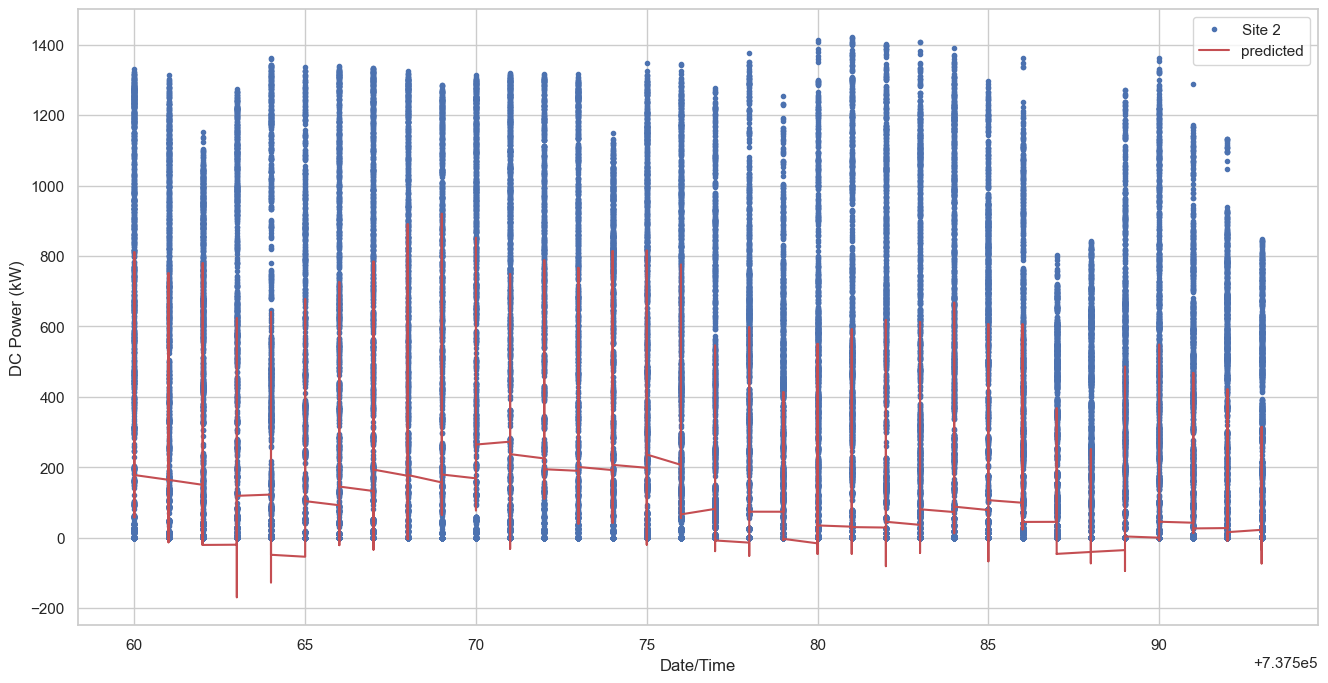

In [45]:
X=df['AMBIENT_TEMPERATURE']
y=df['DC_POWER']

X_train, X_test, y_train, y_test = ts_split(X,y)
model2_lm = LinearRegression()
model2_lm.fit(X_train.values.reshape(-1,1),y_train)

y_pred = model2_lm.predict(X_test.values.reshape(-1,1))
y_full_pred = model2_lm.predict(X.values.reshape(-1,1))

print(f'Regression score for Site 2 = {r2_score(y_pred,y_test):.5f}')
print(f'MSE for Site 2 = {mean_squared_error(y_pred,y_test):.5f}')

# Plot results
fig,ax2 = plt.subplots(figsize=(16,8))
df.plot(x="DATE_TIME",y="DC_POWER",style='.',label="Site 2",ax=ax2)
ax2.plot(df.DATE_TIME.values,model2_lm.predict(X.values.reshape(-1,1)),'r-',label='predicted')
ax2.set_xlabel('Date/Time')
ax2.set_ylabel('DC Power (kW)')
plt.legend()

Unfortunately, that did not yield a good model. It appears that there is not a good way to predict DC power output for site 2 based on only the ambient temperature given the data at hand. However, using the full dataset available, a reasonable model (>75% accuracy) can likely be achieved. At this point, there likely isn't a need for a deep neural network to predict the DC Power outputs as it likely won't yield a more usable model than has already been created here.  

# Takeaways

1. The plant 1 inverters are more stable than the plant 2 inverters.
2. Plant 2 is in a warmer location than plant 1.
3. Plant 2's conversion of solar energy to electrical energy is far more erratic than plant 1, with wider temperature swings and less predictible data.
4. The plant 2 inverter's should likely be cleaned or maintained and then the data re-examined to determine if the model prediction gets better.
5. A univariate model in which the DC power output could be predicted based off of either the date and time or the ambient temperature would be ideal.

    a. Without annual data, the date/time predictions would likely not hold across seasons.
    
    b. There is not a convenient univariate model for ambient temperature. Thus, the model must include several different parameters which may be difficult for a user to obtain ahead of time.



In [47]:
import joblib
joblib.dump(lr,"prediction model.pkl")


['prediction model.pkl']